In [139]:
import pandas as pd

# from inflexionMinimadownbump import findDownBump 

excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
ampdf = pd.read_excel(excel_path+'Amplitudexls.xlsx')
phasedf = pd.read_excel(excel_path+'phase.xlsx')
ampdf[0:6]
# x= nm  , y= nA

,X,Y
0,-0.019733,2.308672
1,-0.019672,2.227800
2,-0.019610,2.213686
3,-0.019549,2.206438
4,-0.019488,2.227037
5,-0.019426,2.226656


In [140]:
phasedf.head()

,X,Y
0,-0.019733,-33.481091
1,-0.019672,-35.271876
2,-0.019610,-33.091073
3,-0.019549,-33.772230
4,-0.019488,-30.415882


In [187]:
ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
print(ampdf.head())
print("\n ",ampdf.shape)

      Piezo  Amplitude
0 -0.019733   2.308672
1 -0.019672   2.227800
2 -0.019610   2.213686
3 -0.019549   2.206438
4 -0.019488   2.227037

  (978, 2)


In [188]:
phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
print("\n",phasedf.head(),"\n",phasedf.shape,"\n")

# print(phasedf.iloc[0,1])
# phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
# print("\n", phase.shape)
# print("\n new phase values: \n", phase[0:5])




       Piezo      Phase
0 -0.019733 -33.481091
1 -0.019672 -35.271876
2 -0.019610 -33.091073
3 -0.019549 -33.772230
4 -0.019488 -30.415882 
 (978, 2) 

-33.48109057

 (978,)

 new phase values: 
 0   -90.000000
1   -88.209215
2   -90.390018
3   -89.708860
4   -93.065209
Name: Phase, dtype: float64


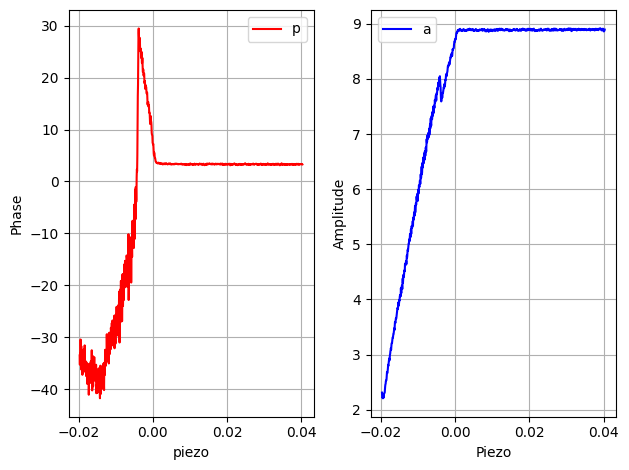

In [189]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
plt.legend('phase')
plt.xlabel('piezo')
plt.ylabel('Phase')
plt.grid() 
plt.subplot(1,2,2)
plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
plt.legend('amplitude')
plt.xlabel('Piezo')
plt.ylabel('Amplitude')
plt.grid() 
plt.tight_layout()
plt.show()

In [144]:
# import numpy as np
# zero_indices = df.loc[df['Column1'] == 0].index

# Print the indices
# print("Indices where 'Column1' has zero values:", zero_indices)
indices_zero = ampdf.loc[ampdf['Piezo'] >= 0].index
zero_orFlatAmp = indices_zero[0]   # zero_orFlatAmp --> this will be used in future 
print(zero_orFlatAmp )
print(ampdf.iloc[322,0])


322
4.1487230170491056e-05


 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (318,)
x values
 and shape of x  4   -0.019488
5   -0.019426
6   -0.019365
7   -0.019303
8   -0.019242
Name: Piezo, dtype: float64 (318,)
I am indsid ethe array: function arary 
: [-0.00038147 -0.01907363  0.02899192 -0.00610356  0.06523182  0.00228884
  0.00305178  0.00991829  0.06446888  0.04653966]
longest sequence =
 [250 251 252 253 254 255]
x axis=
 [-0.00413453 -0.00407312 -0.00401171 -0.00395029 -0.00388888 -0.00382747]
scat val x: 	 
 250
scat val y: 	 
 -0.07934630912000085


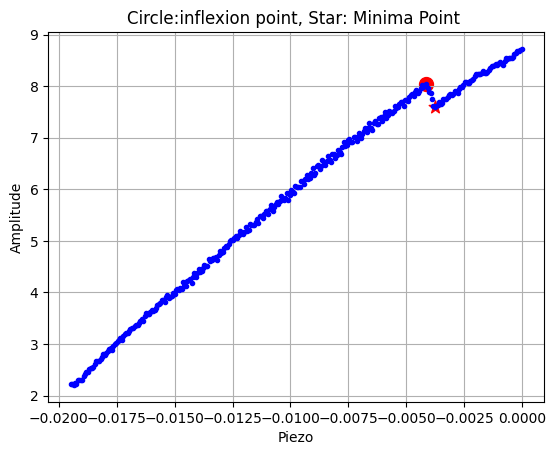


 Actual inflexion point Index with original data :   254  
 Actual Minima point Index before Slicing with original Data :  260 
 inflexion point index after slicing:  250 
 Minima point Index After slicing:  256
index_inflexion 254
index_minima 260


In [145]:
# ampdf
# zero_orFlatAmp

from inflexionMinimadownbump import findDownBump 
res_indices = findDownBump(ampdf,zero_orFlatAmp)
index_inflexion = res_indices[0]
print("index_inflexion",index_inflexion)
index_minima = res_indices[1]
print("index_minima",index_minima)


In [146]:
# index_inflexion = res_indices[0]
# print("index_inflexion",index_inflexion)
# index_minima = res_indices[1]
# print("index_minima",index_minima)

d in nm 	: 0.06141201834528043
6.141201834528043e-05
6.141201834528043e-05
6.141201834528043e-05
6.14120183452839e-05
6.141201834528043e-05
n count back =  66.0

 index starting wrto inflexion :  188.0 
 index starting wrto Minima :  194.0
m (slope in nA/nm ): 0.34074494409675626
c, zero intercept nA (intercept): 9.442109717667925


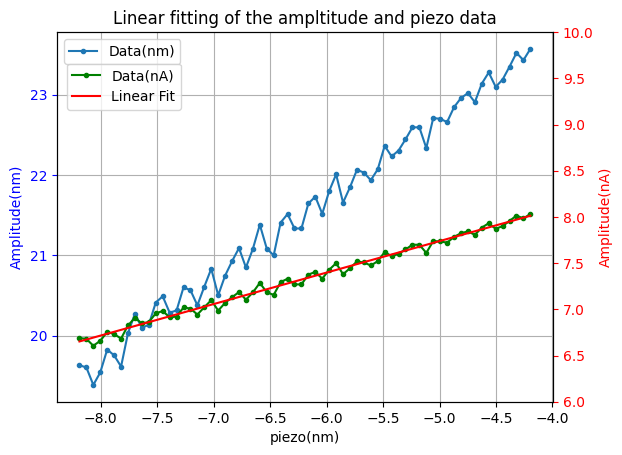

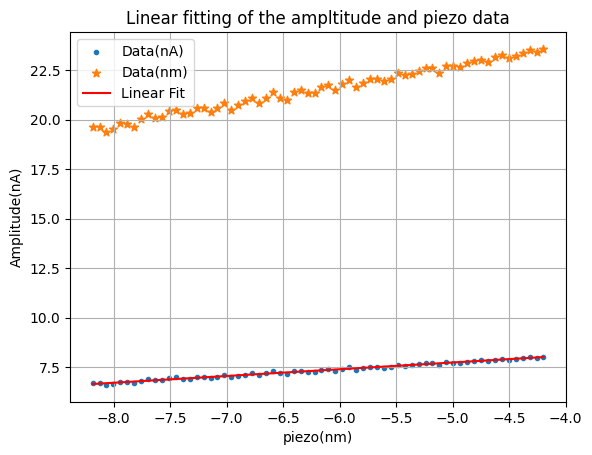

188   -8.187723
189   -8.126311
190   -8.064899
191   -8.003487
192   -7.942075
Name: Piezo, dtype: float64


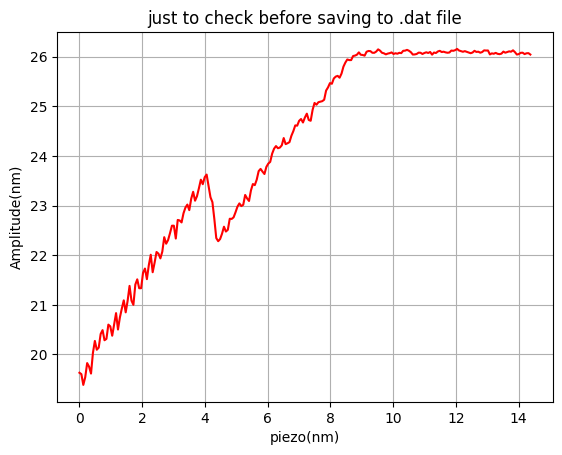

In [179]:
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

x_diff = np.diff(ampdf['Piezo'])

d_nm = 1000*x_diff[5]   # this is in nanometer now. 

print("d in nm \t:",d_nm)

count = 0
for val in x_diff:
    # just to check common differences between piezo values.
    count = count+1
    print(val)
    if count ==5:
        break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()

# here 2.5,3nm any value we put get corresponding N 

N_count_back = (4.0)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)


print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()




# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 
fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the finsl data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 
ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()

d in nm 	: 0.06141201834528043
m (slope in nA/nm ): 0.3826280314162402
c, zero intercept nA (intercept): 9.731976002579257


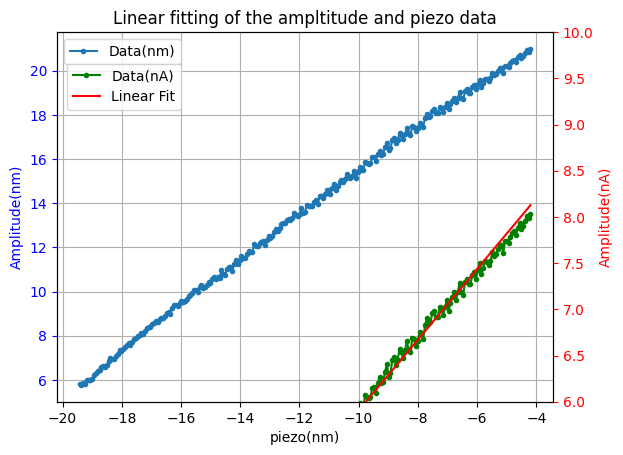

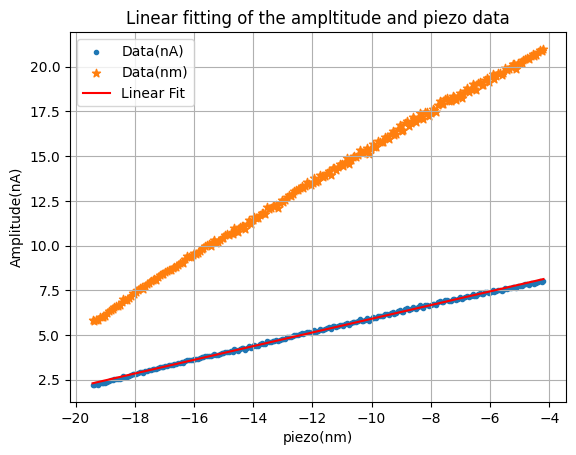

 size of the data 
 (418,)


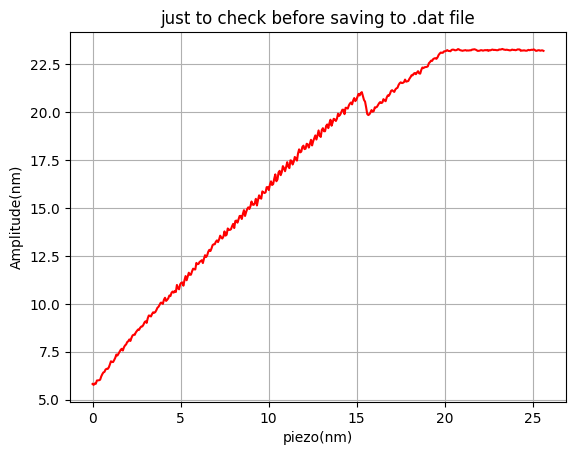

-33.48109057

 (978,)

 new phase values: 
 0   -90.000000
1   -88.209215
2   -90.390018
3   -89.708860
4   -93.065209
Name: Phase, dtype: float64


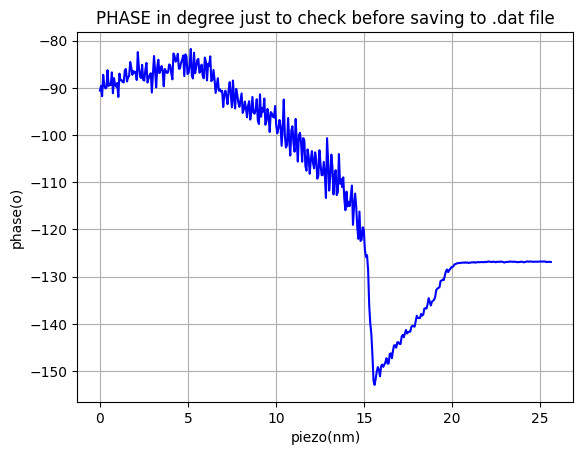


 (418,) 
 (418,) 
 (418,)


In [199]:
##-------------*********************-this is another methode without triming from the left.*************

import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

x_diff = np.diff(ampdf['Piezo'])
d_nm = 1000*x_diff[8]   # this is in nanometer now. common difference.
print("d in nm \t:",d_nm)

# count = 0
# for val in x_diff:
#     # just to check common differences between piezo values.
#     count = count+1
#     print(val)
#     if count ==5:
#         break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()

# here 2.5,3nm any value we put get corresponding N 

# N_count_back = (4.0)/(d_nm)  #(using a+(n-1)D)

# N_count_back = np.ceil(N_count_back)
# print("n count back = ",N_count_back)

# desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

# desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# # desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)


# print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
#      "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

# desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
# desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting
start_slice = 5
ampdf_x_nm = 1000*ampdf['Piezo'][start_slice:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][start_slice:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()




# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 
fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ************************** this is the finsl data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[start_slice:data_choose_endindex]
# ampdata2saveAspiezo_nm.shape
# print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[start_slice]
# print(ampdata2saveAspiezo_nm.head())
ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][start_slice:data_choose_endindex]
print(" size of the data \n",ampdata2saveAsAmplitude_nm.shape)



plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


#  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1])
phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[start_slice:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# now generate a .dat file from the where data is saved ( unit: nm)

import pandas as pd
df1 = ampdata2saveAspiezo_nm
df2 = ampdata2saveAsAmplitude_nm
df3 = phasedata2savedegree
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
# Concatenate the DataFrames vertically
combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file
combined_df.to_csv(excel_path+'finalcombined_data.dat', sep=' ', index=False, header=False)



# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [197]:
# import numpy as np
# # start_pointampl = int(input("please enter the starting point index for fitting,start_pointampl(typical:4) : "))
# # end_pointampl = int(input("please enter the end point index for fitting: end_pointampl(typical:60) : "))
# start_pointampl = 0
# end_pointampl = zero_orFlatAmp
# ampdf_x =ampdf.iloc[start_pointampl:end_pointampl,0] 
# ampdf_x = np.array(ampdf_x)   # numpy array 
# print("ampdf_x\n",ampdf_x) 
# # ampdfx =np.ampdf_x
# ampdf_y = ampdf.iloc[start_pointampl:end_pointampl,1]
# ampdf_y = np.array(ampdf_y)  # numpy array  nA/nm
# print(ampdf_y)   

In [193]:
# ampdata2saveAspiezo_nm.head()

In [194]:
# xpiezo_nm[0:5]

In [137]:
# # ampdf_x[0:-5].shape
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = 4*(np.cos(x))

# # Create the first y-axis
# fig, ax1 = plt.subplots()
# ax1.plot(x, y1, 'b-', label='y1')
# ax1.set_xlabel('X Axis')
# ax1.set_ylabel('Y1 Axis', color='b')
# ax1.tick_params('y', colors='b')

# # Create the second y-axis (share the x-axis)
# ax2 = ax1.twinx()
# ax2.plot(x, y2, 'r-', label='y2')
# ax2.set_ylabel('Y2 Axis', color='r')
# ax2.tick_params('y', colors='r')

# # Display the plot
# plt.title('Double Y-axis Plot')
# plt.show()


m (slope): 341.77484483841477
c, zero intercept (intercept): 9.168378162535877
difference numpy array: 
 [0.30236233 0.34242505 0.33442221 0.36151485 0.31727211 0.33597236
 0.35390966 0.36498046 0.32150067]


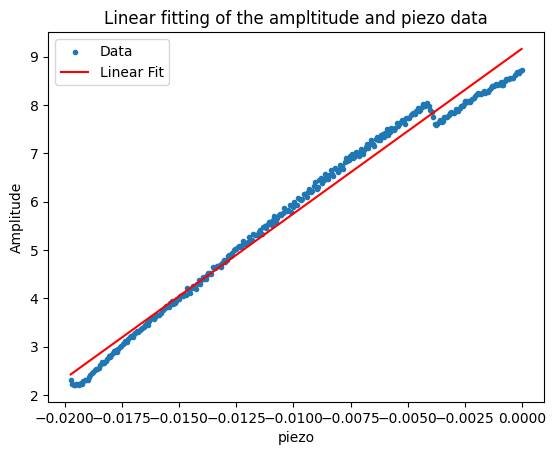

In [54]:
# Perform linear regression for linear fitting

coefficients = np.polyfit(ampdf_x[4:-2], ampdf_y[4:-2], 1)
m, c = coefficients
# Print the results
print(f"m (slope): {m}")
print(f"c, zero intercept (intercept): {c}")
poly = np.poly1d(coefficients)
diff_df = np.abs(ampdf_y[4:-2] - poly(ampdf_x[4:-2]))

print("difference numpy array: \n",diff_df[1:10])
# Plot the data and the linear fit
plt.scatter(ampdf_x, ampdf_y, marker ='.',label='Data')
plt.plot(ampdf_x, poly(ampdf_x), color='red', label='Linear Fit')

plt.xlabel('piezo')
plt.ylabel('Amplitude')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()

In [ ]:
ampdf.head()

In [55]:
# df = ampdf[3:zero_orFlatAmp]
# df.head()
# df
# ampdf.head()
# df.head()
dat1 = {'x':list(range(10)), 'y':np.array(np.random.randint(1,20,size=(10)))}

df12= pd.DataFrame(dat1)
print(df12)
df11 = df12[3:7]
# print(df11)
# df22[0:2]
print("new df11\n",df11)
df_diff = np.abs(np.diff(df11['y']))
print("size",df_diff.size, df_diff)
max_diff_index = np.argmax(df_diff)
print(max_diff_index)

print("original index   wr.to:",df12['x'].iloc[max_diff_index], df12['y'].iloc[max_diff_index])
# print("new diff indexes wr.to:", df_diff['x'].iloc[max_diff_index], df_diff['y'].iloc[max_diff_index])

   x   y
0  0   6
1  1   9
2  2  13
3  3  15
4  4  10
5  5   2
6  6   8
7  7   3
8  8  16
9  9  17
new df11
    x   y
3  3  15
4  4  10
5  5   2
6  6   8
size 3 [5 8 6]
1
original index   wr.to: 1 9


In [ ]:
   
    
    # Find the indices with maximum difference in consecutive 'Amplitude' values
#     diff_amplitude = np.abs(np.diff(df['Amplitude']))
#     max_diff_index = np.argmax(diff_amplitude)

#     # Plot the original data
#     plt.plot(df['piezo'], df['Amplitude'], marker='.', label='Amplitude')

#     # Mark the points with maximum difference
#     plt.scatter(df['piezo'].iloc[max_diff_index], df['Amplitude'].iloc[max_diff_index], color='red', label='Max Diff Point')

#     # Add labels and legend
#     plt.xlabel('piezo')
#     plt.ylabel('Amplitude')
#     plt.legend()

#     # Show the plot
#     plt.show()

#     # Print the index with maximum difference
#     print(f"Index with maximum difference: {max_diff_index}")

    
    # import pandas as pd
    # import numpy as np
    # import matplotlib.pyplot as plt

    # # Create a sample DataFrame
    # data = {
    #     'Piezo': ['A', 'B', 'C', 'D', 'E'],
    #     'Amplitude': [10, 15, 8, 25, 20]
    # }

    # df = pd.DataFrame(data)

    # Find the indices where 'Amplitude' values are continuously decreasing
#     decreasing_indices = np.where(np.diff(df['Amplitude']) < 0)[0]

#     # Plot the original data
#     plt.plot(df['piezo'], df['Amplitude'], marker='.', label='Amplitude')

#     # Mark the points where 'Amplitude' values are continuously decreasing
#     plt.scatter(df['piezo'].iloc[decreasing_indices], df['Amplitude'].iloc[decreasing_indices], color='red', label='Decreasing Points')

#     # Add labels and legend
#     plt.xlabel('piezo')
#     plt.ylabel('Amplitude')
#     plt.legend()

#     # Show the plot
#     plt.show()

#     # Print the indices where 'Amplitude' values are continuously decreasing
#     print(f"Indices where 'Amplitude' values are continuously decreasing: {decreasing_indices}")



#     # Find the indices where 'Amplitude' values are continuously decreasing
#     decreasing_diff = (np.diff(df['Amplitude']))
#     decreasing_starts = np.where(decreasing_diff < 0)[0]  # potential starting points of decreasing sequences

#     # Find the lengths of consecutive decreasing sequences
#     decreasing_lengths = np.diff(np.where(np.concatenate(([decreasing_starts[0] - 1], decreasing_diff < 0, [True])))[0])[::6]

#     # Identify the index range for the longest decreasing sequence
#     if decreasing_lengths.size > 0:
#         longest_decreasing_start = decreasing_starts[np.argmax(decreasing_lengths)]
#         longest_decreasing_end = longest_decreasing_start + np.max(decreasing_lengths)
#     else:
#         longest_decreasing_start = 0
#         longest_decreasing_end = 0

#     # Plot the original data
#     plt.plot(df['Piezo'], df['Amplitude'], marker='.', label='Amplitude')

#     # Mark the points where the longest decreasing sequence occurs
#     plt.scatter(df['Piezo'].iloc[longest_decreasing_start:longest_decreasing_end + 1], 
#                 df['Amplitude'].iloc[longest_decreasing_start:longest_decreasing_end + 1], 
#                 color='red', label='Longest Decreasing Sequence')

#     # Add labels and legend
#     plt.xlabel('Piezo')
#     plt.ylabel('Amplitude')
#     plt.legend()

#     # Show the plot
#     plt.show()

#     # Print the index range for the longest decreasing sequence
#     print(f"Longest decreasing sequence indices: {longest_decreasing_start} to {longest_decreasing_end}")


    
# findDownBump(ampdf,zero_orFlatAmp)    

In [ ]:
def add():
    a= list(range(9))
    print("list values:",a)
    sum = a[0] + a[8]
    sub = a[2]-a[3]
    div = a[8]/a[1]
    return(sum,sub,div)
reval = add()
for val in reval:
    print(val)
#     print(reval[i])
        

C:\Users\mrafik\AppData\Local\Temp\ipykernel_18104\962107243.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_y'] = m * df['x'] + c
C:\Users\mrafik\AppData\Local\Temp\ipykernel_18104\962107243.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = np.abs(df['predicted_y'] - df['y'])


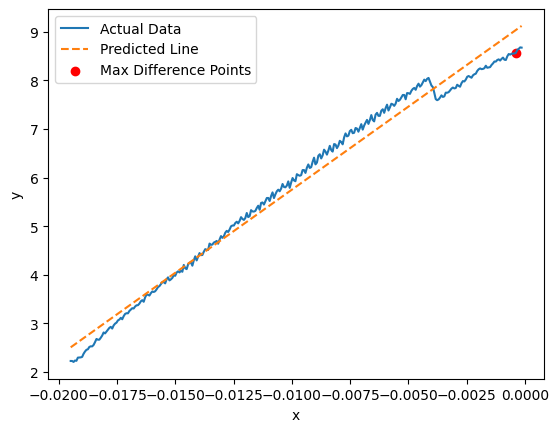

Points with maximum difference:
x   -0.000388
y    8.563679
Name: 315, dtype: float64


In [56]:
"""  this is for finding the down bump in the plot of amplitude just provide the arguments df, zero_orFlatAmp """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= ampdf.set_axis(['x','y'], axis ='columns')
# print(df.head())
# df = df[4:(zero_orFlatAmp-40)]
def findmax_fit(df,zero_orFlatAmp):
    df = df[4:(zero_orFlatAmp-2)]
    coefficients = np.polyfit(df['x'], df['y'], 1)
    m, c = coefficients
    # Define the line equation parameters
#     m = 2.0  # slope
#     c = 1.0  # intercept

    # Calculate the predicted y values from the line equation
    df['predicted_y'] = m * df['x'] + c

    # Calculate the difference between predicted y and actual y
    df['difference'] = np.abs(df['predicted_y'] - df['y'])

    # Find the indices where the difference is maximum
    max_diff_indices = df['difference'].idxmax()

    # Get the corresponding data points
    max_diff_points = df.loc[max_diff_indices, ['x', 'y']]

    # Plot the data points
    plt.plot(df['x'], df['y'], label='Actual Data')
    plt.plot(df['x'], df['predicted_y'], label='Predicted Line', linestyle='--')

    # Highlight the points with maximum difference
    plt.scatter(max_diff_points['x'], max_diff_points['y'], color='red', label='Max Difference Points')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Show the plot
    plt.show()

    print("Points with maximum difference:")
    print(max_diff_points)
    
    
findmax_fit(df,zero_orFlatAmp)

In [39]:
# # ampdf.head()
# # df.head()
# dat1 = {'x':list(range(10)), 'y':np.array(np.random.randint(1,8,size=(10)))}

# df12= pd.DataFrame(dat1)
# print(df12)
# df11 = df12[3:7]
# # print(df11)
# # df22[0:2]
# # print("new df11\n",df11)
# df_diff = np.abs(np.diff(df11['y']))
# print("size",df_diff.size, df_diff)
# max_diff_index = np.argmax(df_diff)
# print(max_diff_index)


In [40]:
# df11

C:\Users\mrafik\AppData\Local\Temp\ipykernel_18104\962107243.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_y'] = m * df['x'] + c
C:\Users\mrafik\AppData\Local\Temp\ipykernel_18104\962107243.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = np.abs(df['predicted_y'] - df['y'])


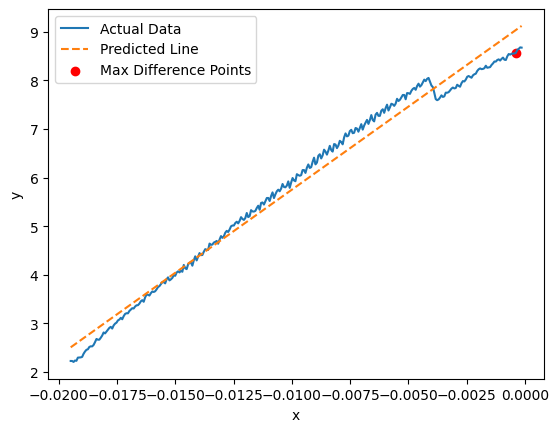

Points with maximum difference:
x   -0.000388
y    8.563679
Name: 315, dtype: float64


In [41]:
findmax_fit(df,zero_orFlatAmp)

In [42]:
print(ampdf.tail())
print(ampdf.iloc[-1,0])

        Piezo  Amplitude
973  0.040021   8.862754
974  0.040082   8.873054
975  0.040144   8.880683
976  0.040205   8.878013
977  0.040266   8.897086
0.04026635924632949


In [43]:
poly(ampdf.iloc[-1,0])

NameError: name 'poly' is not defined

In [44]:
ampdf.iloc[-1,0]   # this represent last value of the in the first column
# ampdf.iloc[977,0]  --> both are same  and ampdf.tail()

0.04026635924632949

In [45]:
y = m*ampdf.iloc[-1,0] + c
print("y value at last point : \t",y)

NameError: name 'm' is not defined

In [46]:
ampdf_shiftx = ampdf.iloc[:,0] + (c/m)
ampdf_shiftx 

NameError: name 'c' is not defined

In [47]:
# xl = list(range(6))
# xl
# xdf=pd.DataFrame(xl)
# xdf = xdf+-3
# xdf
xamp_m = (ampdf_shiftx)*1E-9 
yamp_nm = (1/m)*ampdf['Amplitude']
yamp_m = (yamp_nm)*1E-9 

NameError: name 'ampdf_shiftx' is not defined

In [48]:
# plt.subplot(1,2,2)

plt.plot(xamp_m,yamp_m,'-b')
plt.legend('amplitude')
plt.xlabel('piezo')
plt.ylabel('Amplitude')
plt.grid() 
plt.tight_layout()
plt.xlim([0,None])
plt.show()

NameError: name 'xamp_m' is not defined

In [49]:
xamp_m.head()

NameError: name 'xamp_m' is not defined

In [50]:
yamp_m.head()

NameError: name 'yamp_m' is not defined

In [51]:
from scipy.signal import find_peaks
# Sample data (replace this with your actual data)
x = xamp_m
y = yamp_m
# Plot the original data
plt.plot(x, y, label='Original Data')

# Find peaks (minima) in the data
minima_indices, _ = find_peaks(-y)

# Plot detected minima
plt.plot(x[minima_indices], y[minima_indices], '.r', label='Detected Minima')

NameError: name 'xamp_m' is not defined